In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
customer=pd.read_csv("customer.csv")
sales=pd.read_csv("sales.csv")
products=pd.read_csv("products.csv")
df2=sales.merge(products, on='product_id', how='left')
df=df2.merge(customer, on='customer_id', how='left')

In [2]:
df.head()

,serial_number,order_id,order_date,delivery_date,time_of_order,time_of_delivery,delivery_mode,sales_agent,payment_mode,delivery_rating,...,customer_age,Customer_type,country,city,state,SMS_Marketing,Email_Marketing,Membership_type,Joining_date,App_Downloaded
0,4720,D-94655-11910,03-01-2019,07-01-2019,10:50 AM,5:12 PM,Standard Class,Robert Paige,Debit Card,2,...,66,City Club,United States,Arlington,Virginia,NO,YES,Silver,20-02-2020,NO
1,428,D-75151-11913,04-01-2019,08-01-2019,1:27 PM,3:52 PM,Standard Class,Chris Jr,Debit Card,1,...,53,State Club,United States,Huntsville,Texas,NO,NO,Silver,04-11-2019,NO
2,429,C-55852-11913,04-01-2019,08-01-2019,1:12 PM,5:23 PM,Standard Class,Tom Renner,Credit card,1,...,70,City Club,United States,Newark,Ohio,NO,YES,Gold,17-06-2019,YES
3,1041,D-13194-11912,05-01-2019,12-01-2019,12:17 PM,10:11 AM,Standard Class,Robert Hemsworth,Debit Card,2,...,53,State Club,United States,Huntsville,Texas,NO,NO,Silver,04-11-2019,NO
4,4229,C-26707-11916,06-01-2019,07-01-2019,4:36 PM,1:41 PM,First Class,John Wick,Cash,2,...,48,State Club,United States,Saint Paul,Minnesota,YES,NO,Basic,01-02-2020,YES


In [3]:
bar=df[['state','sales']]
bar.sample(5)

,state,sales
1781,Oregon,710.832
1614,Pennsylvania,409.590
4804,Tennessee,32.432
3823,Michigan,207.760
4896,Texas,38.880


In [4]:
bar_df=bar.groupby('state').agg('sum').reset_index()
bar_df.head()

,state,sales
0,Alabama,13765.8858
1,Arizona,55390.2810
2,Arkansas,2342.5140
3,California,242401.9553
4,Colorado,34659.2132


In [5]:
bar_df.sort_values('sales',inplace=True)
bar_df.head()

,state,sales
7,District of Columbia,145.272
23,Nevada,247.336
13,Kansas,369.928
34,South Dakota,756.410
16,Maryland,1110.320


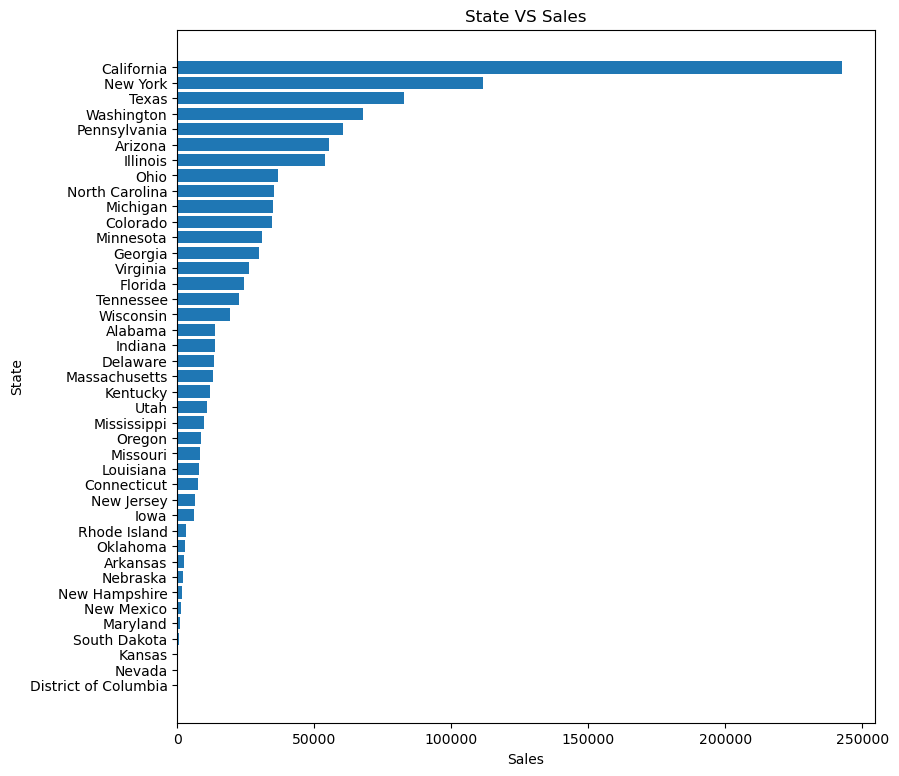

In [6]:
plt.figure(figsize=(9,9))
plt.barh(bar_df['state'], bar_df['sales'])
plt.title('State VS Sales')
plt.xlabel('Sales')
plt.ylabel('State')
plt.show()